# Spatial Operation

TODO: use `np.uint8(...)` instead of `np.int`
TODO: use `np.histogram(...)` instead of `plt.hist` (RGB2GRAY must be correct!!!, but not correctcause something interesting???)
TODO: use `M x N` instead of `np.sum(hist[0])`
TODO: discuss efficiency problem, `for` and so on
TODO: how to accelerate img that only has few gray scale
TODO: `hist` function should be designed myself (by teacher)
TODO: change `_H = H + _s_half`
TODO: `box_filtered` change name...
TODO: optimize hist methods

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

# plt.style.use('default')

## Bit-Plane Slicing

In [6]:
img = cv2.cvtColor(cv2.imread("./Yileina.png"), cv2.COLOR_BGR2GRAY)
h, w = img.shape[0], img.shape[1]

new_img = np.zeros((h, w, 8))
for i in range(h):
    for j in range(w):
        n = str(np.binary_repr(img[i, j], 8))
        for k in range(8):
            new_img[i, j, k] = n[k]


In [7]:
new_img[:10, :10, 7]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 1., 0., 0., 0.]])

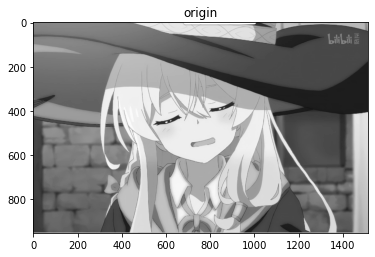

In [8]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('origin')
plt.show()

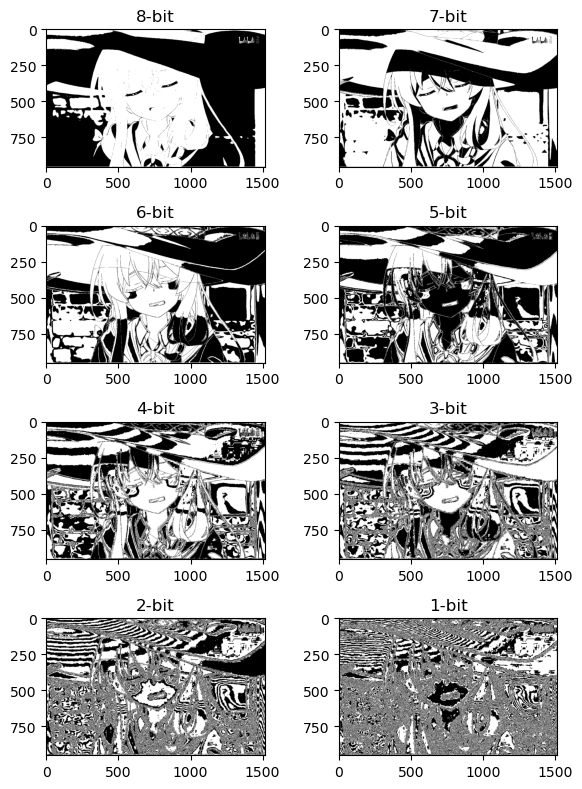

In [9]:
plt.figure(figsize=(6, 8), dpi=100)
plt.subplot(4, 2, 1)
plt.imshow(new_img[:, :, 0], cmap='gray')
plt.title('8-bit')
plt.subplot(4, 2, 2)
plt.imshow(new_img[:, :, 1], cmap='gray')
plt.title('7-bit')
plt.subplot(4, 2, 3)
plt.imshow(new_img[:, :, 2], cmap='gray')
plt.title('6-bit')
plt.subplot(4, 2, 4)
plt.imshow(new_img[:, :, 3], cmap='gray')
plt.title('5-bit')
plt.subplot(4, 2, 5)
plt.imshow(new_img[:, :, 4], cmap='gray')
plt.title('4-bit')
plt.subplot(4, 2, 6)
plt.imshow(new_img[:, :, 5], cmap='gray')
plt.title('3-bit')
plt.subplot(4, 2, 7)
plt.imshow(new_img[:, :, 6], cmap='gray')
plt.title('2-bit')
plt.subplot(4, 2, 8)
plt.imshow(new_img[:, :, 7], cmap='gray')
plt.title('1-bit')
plt.tight_layout()
plt.show()

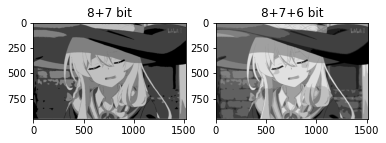

In [10]:
reconstruct = new_img[:, :, 0] * 2 ** 7 + new_img[:, :, 1] * 2 ** 6
plt.subplot(1, 2, 1)
plt.imshow(reconstruct, cmap='gray', vmin=0, vmax=255)
plt.title('8+7 bit')
reconstruct += new_img[:, :, 2] * 2 ** 5
plt.subplot(1, 2, 2)
plt.imshow(reconstruct, cmap='gray', vmin=0, vmax=255)
plt.title('8+7+6 bit')
plt.show()

## Histogram

### Histogram Equalization

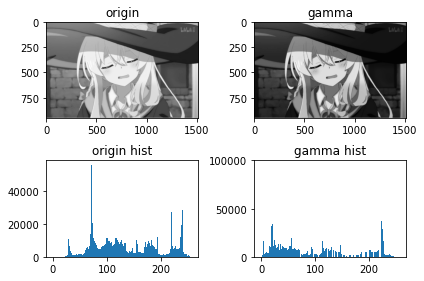

In [11]:
gamma = 2
gamma_img = np.round(np.power(img / 255.0, gamma) * 255).astype(int)

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('origin')
plt.subplot(2, 2, 2)
plt.imshow(gamma_img, cmap='gray', vmin=0, vmax=255)
plt.title('gamma')
plt.subplot(2, 2, 3)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('origin hist')
plt.subplot(2, 2, 4)
plt.hist(gamma_img.ravel(), 256, [0, 256])
plt.title('gamma hist')

plt.tight_layout()
plt.show()

In [12]:
origin_hist = np.histogram(gamma_img.ravel(), 256, [0, 256])
origin_hist_arr = np.array(origin_hist[0])
r_pdf = origin_hist_arr / np.sum(origin_hist_arr)

In [13]:
np.sum(r_pdf)

1.0

In [14]:
r_cumsum = np.round(255 * np.cumsum(r_pdf)).astype(int)
r_cumsum

array([  0,   0,   0,  10,  12,  14,  14,  15,  16,  16,  17,  18,  18,
        19,  20,  22,  24,  26,  29,  35,  52,  58,  60,  63,  66,  67,
        70,  70,  72,  73,  75,  76,  78,  79,  80,  83,  84,  86,  90,
        92,  94,  95,  99, 100, 102, 103, 105, 108, 109, 110, 111, 113,
       115, 117, 119, 121, 125, 127, 128, 129, 131, 133, 134, 136, 137,
       138, 140, 141, 142, 144, 145, 146, 146, 147, 148, 148, 148, 149,
       149, 150, 151, 151, 152, 152, 152, 153, 154, 154, 155, 155, 155,
       155, 156, 158, 160, 161, 161, 162, 162, 163, 163, 163, 164, 164,
       164, 165, 165, 165, 166, 166, 166, 167, 168, 171, 171, 172, 173,
       175, 175, 176, 178, 180, 180, 181, 183, 183, 184, 185, 186, 186,
       188, 189, 189, 191, 192, 192, 193, 194, 194, 195, 196, 196, 196,
       197, 197, 198, 200, 200, 201, 201, 201, 201, 202, 202, 202, 202,
       202, 202, 203, 203, 203, 203, 203, 203, 203, 204, 204, 204, 204,
       204, 204, 205, 205, 205, 205, 205, 205, 205, 206, 206, 20

In [15]:
equalized = np.zeros_like(gamma_img)
for i in range(256):
    equalized[gamma_img == i] = r_cumsum[i]

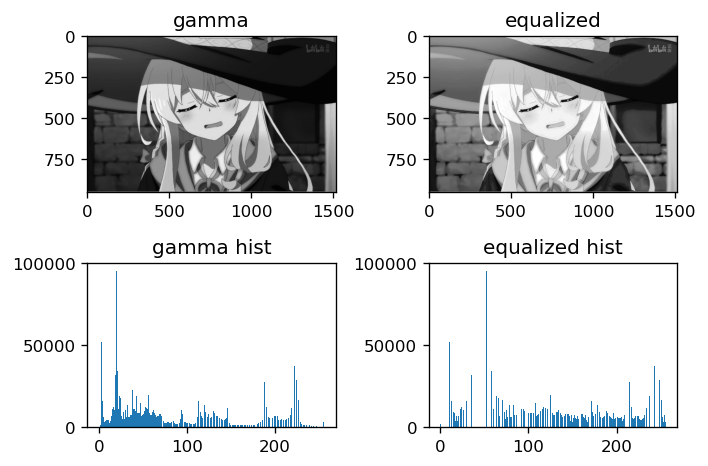

In [16]:
plt.figure(dpi=120)

# plt.subplot(2, 3, 1)
# plt.imshow(img, cmap='gray', vmin=0, vmax=255)
# plt.title('origin')
plt.subplot(2, 2, 1)
plt.imshow(gamma_img, cmap='gray', vmin=0, vmax=255)
plt.title('gamma')
plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray', vmin=0, vmax=255)
plt.title('equalized')

# plt.subplot(2, 3, 4)
# plt.hist(img.ravel(), 256, [0, 256])
# plt.title('origin hist')
plt.subplot(2, 2, 3)
plt.hist(gamma_img.ravel(), 256, [0, 256])
plt.title('gamma hist')
plt.subplot(2, 2, 4)
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('equalized hist')

plt.tight_layout()
plt.show()

### Histogram Matching

In [17]:
# gamma = 10
# gamma_img = np.round(np.power(img / 255.0, gamma) * 255).astype(int)
# origin_hist = plt.hist(gamma_img.ravel(), 256, [0, 256])
# origin_hist_arr = np.array(origin_hist[0])

In [18]:
s_k = np.round(255 / np.sum(origin_hist_arr) * np.cumsum(origin_hist_arr)).astype(int)
s_k

array([  0,   0,   0,  10,  12,  14,  14,  15,  16,  16,  17,  18,  18,
        19,  20,  22,  24,  26,  29,  35,  52,  58,  60,  63,  66,  67,
        70,  70,  72,  73,  75,  76,  78,  79,  80,  83,  84,  86,  90,
        92,  94,  95,  99, 100, 102, 103, 105, 108, 109, 110, 111, 113,
       115, 117, 119, 121, 125, 127, 128, 129, 131, 133, 134, 136, 137,
       138, 140, 141, 142, 144, 145, 146, 146, 147, 148, 148, 148, 149,
       149, 150, 151, 151, 152, 152, 152, 153, 154, 154, 155, 155, 155,
       155, 156, 158, 160, 161, 161, 162, 162, 163, 163, 163, 164, 164,
       164, 165, 165, 165, 166, 166, 166, 167, 168, 171, 171, 172, 173,
       175, 175, 176, 178, 180, 180, 181, 183, 183, 184, 185, 186, 186,
       188, 189, 189, 191, 192, 192, 193, 194, 194, 195, 196, 196, 196,
       197, 197, 198, 200, 200, 201, 201, 201, 201, 202, 202, 202, 202,
       202, 202, 203, 203, 203, 203, 203, 203, 203, 204, 204, 204, 204,
       204, 204, 205, 205, 205, 205, 205, 205, 205, 206, 206, 20

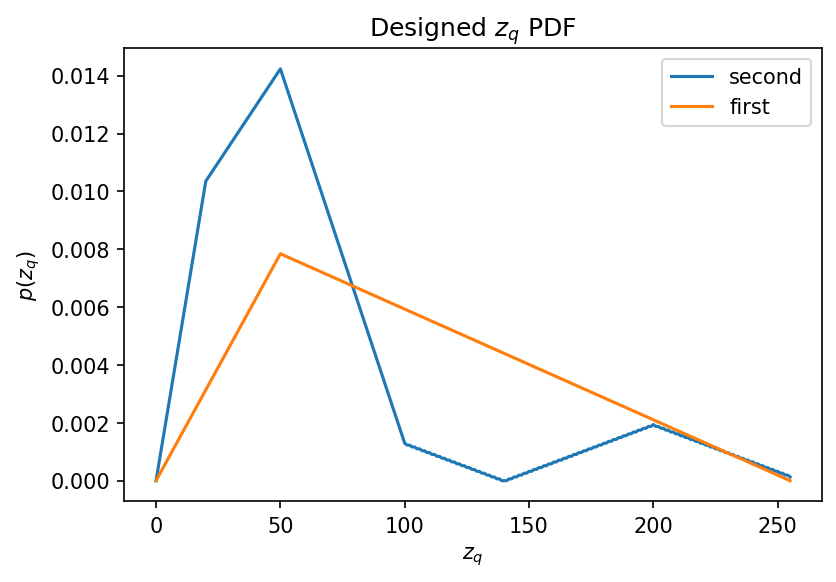

In [19]:
# design z_q
plt.figure(dpi=150)
z_q = np.zeros_like(origin_hist_arr)

z_q[:20] = 8 * np.arange(20)
z_q[20:50] = 160 + 2 * np.arange(30)
z_q[50:100] = 220 - 4 * np.arange(50)
z_q[100:140] = 20 - 0.5 * np.arange(40)
z_q[140:200] = 0.5 * np.arange(60)
z_q[200:] = 30 - 0.5 * np.arange(56)

z_q = z_q / np.sum(z_q)
plt.plot(z_q, label='second')

z_q[:50] = 250 / 50 * np.arange(50)
z_q[50:] = 250 - 250 / 205 * np.arange(206)

z_q = z_q / np.sum(z_q)
plt.plot(z_q, label='first')

plt.legend()
plt.title('Designed $z_q$ PDF')
plt.xlabel('$z_q$')
plt.ylabel('$p(z_q)$')
plt.show()

In [20]:
z_q2s_k = np.round(255 * np.cumsum(z_q)).astype(int)
z_q2s_k

array([  0,   0,   0,   0,   0,   1,   1,   1,   1,   2,   2,   3,   3,
         4,   4,   5,   5,   6,   7,   8,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  19,  20,  21,  22,  24,  25,  27,  28,  30,
        31,  33,  34,  36,  38,  40,  41,  43,  45,  47,  49,  51,  53,
        55,  57,  59,  61,  63,  65,  67,  69,  70,  72,  74,  76,  78,
        80,  82,  84,  85,  87,  89,  91,  93,  94,  96,  98, 100, 101,
       103, 105, 106, 108, 110, 112, 113, 115, 117, 118, 120, 121, 123,
       125, 126, 128, 129, 131, 132, 134, 136, 137, 139, 140, 142, 143,
       145, 146, 147, 149, 150, 152, 153, 155, 156, 157, 159, 160, 161,
       163, 164, 165, 167, 168, 169, 171, 172, 173, 174, 176, 177, 178,
       179, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       219, 220, 221, 222, 223, 223, 224, 225, 226, 226, 227, 22

In [21]:
last = 0
matched = np.zeros_like(img)
for i in range(256):  # r -> s
    for j in range(last, 256):  # z -> s
        if s_k[i] < z_q2s_k[j]:
            print('rk:', i, 'sk:', s_k[i], 'zq2sk:', z_q2s_k[j - 1], 'zq:', j - 1)
            matched[gamma_img == i] = j - 1
            last = j - 1
            break

rk: 0 sk: 0 zq2sk: 0 zq: 4
rk: 1 sk: 0 zq2sk: 0 zq: 4
rk: 2 sk: 0 zq2sk: 0 zq: 4
rk: 3 sk: 10 zq2sk: 10 zq: 22
rk: 4 sk: 12 zq2sk: 12 zq: 24
rk: 5 sk: 14 zq2sk: 14 zq: 26
rk: 6 sk: 14 zq2sk: 14 zq: 26
rk: 7 sk: 15 zq2sk: 15 zq: 27
rk: 8 sk: 16 zq2sk: 16 zq: 28
rk: 9 sk: 16 zq2sk: 16 zq: 28
rk: 10 sk: 17 zq2sk: 17 zq: 29
rk: 11 sk: 18 zq2sk: 17 zq: 29
rk: 12 sk: 18 zq2sk: 17 zq: 29
rk: 13 sk: 19 zq2sk: 19 zq: 30
rk: 14 sk: 20 zq2sk: 20 zq: 31
rk: 15 sk: 22 zq2sk: 22 zq: 33
rk: 16 sk: 24 zq2sk: 24 zq: 34
rk: 17 sk: 26 zq2sk: 25 zq: 35
rk: 18 sk: 29 zq2sk: 28 zq: 37
rk: 19 sk: 35 zq2sk: 34 zq: 41
rk: 20 sk: 52 zq2sk: 51 zq: 50
rk: 21 sk: 58 zq2sk: 57 zq: 53
rk: 22 sk: 60 zq2sk: 59 zq: 54
rk: 23 sk: 63 zq2sk: 63 zq: 56
rk: 24 sk: 66 zq2sk: 65 zq: 57
rk: 25 sk: 67 zq2sk: 67 zq: 58
rk: 26 sk: 70 zq2sk: 70 zq: 60
rk: 27 sk: 70 zq2sk: 70 zq: 60
rk: 28 sk: 72 zq2sk: 72 zq: 61
rk: 29 sk: 73 zq2sk: 72 zq: 61
rk: 30 sk: 75 zq2sk: 74 zq: 62
rk: 31 sk: 76 zq2sk: 76 zq: 63
rk: 32 sk: 78 zq2sk: 78 zq:

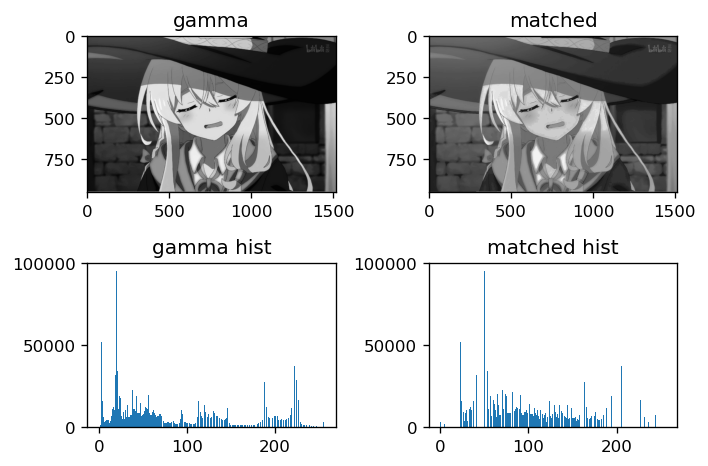

In [22]:
plt.figure(dpi=120)

plt.subplot(2, 2, 1)
plt.imshow(gamma_img, cmap='gray', vmin=0, vmax=255)
plt.title('gamma')
plt.subplot(2, 2, 2)
plt.imshow(matched, cmap='gray', vmin=0, vmax=255)
plt.title('matched')

plt.subplot(2, 2, 3)
plt.hist(gamma_img.ravel(), 256, [0, 256])
plt.title('gamma hist')
plt.subplot(2, 2, 4)
plt.hist(matched.ravel(), 256, [0, 256])
plt.title('matched hist')

plt.tight_layout()
plt.show()

### Local Histogram Operation

In [23]:
img = cv2.cvtColor(cv2.imread('Fig0326.tif'), cv2.COLOR_RGB2GRAY)
H = img.shape[0]
W = img.shape[1]

In [24]:
def hist_equalization(arr):
    """
    Do histogram equalization for the input array(image)
    :param arr: input M x N sized image
    :return: M x N sized equalized array(image)
    """
    hist = np.histogram(arr.ravel(), 256, [0, 256])
    pdf = np.array(hist[0]) / np.sum(hist[0])
    cdf = np.uint8(np.round(255 * np.cumsum(pdf)))
    equal = np.zeros_like(arr)
    for idx in range(256):
        equal[arr == idx] = cdf[idx]
    return equal

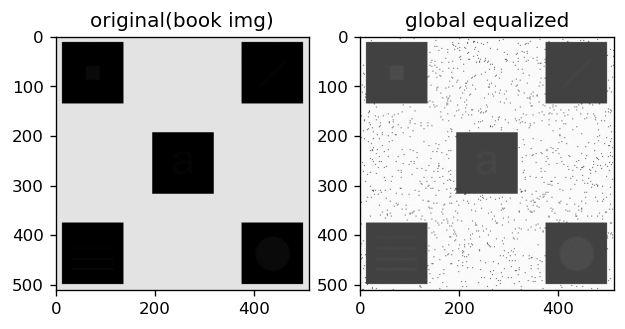

In [25]:
plt.figure(dpi=120)
equalized2 = hist_equalization(img)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('original(book img)')
plt.subplot(1, 2, 2)
plt.imshow(equalized2, cmap='gray', vmin=0, vmax=255)
plt.title('global equalized')
plt.show()

In [26]:
import time

In [29]:
start = time.time()
kernel_size = 7
stride = 1
s_half = kernel_size // 2
l_half = kernel_size // 2 + 1
padded_img = np.pad(img, (s_half, s_half))
local_equalized = np.zeros_like(img)
_H = H + 1
_W = W + 1
for i in range(s_half, _H, stride):
    for j in range(s_half, _W, stride):
        local_equalized[i - 1, j - 1] = hist_equalization(padded_img[i - s_half:i + l_half, j - s_half:j + l_half])[
            s_half, s_half]
end = time.time()
print(end - start)

189.1200397014618


In [43]:
# 185.42934679985046
# 185.37785243988037
# 189.1200397014618
time1 = np.array([185.42934679985046, 185.37785243988037, 189.1200397014618])
# 4.507423639297485
# 6.344444513320923
# 8.907160758972168
time2 = np.array([4.507423639297485, 6.344444513320923, 8.907160758972168])
x_axis = np.array([3, 5, 7])

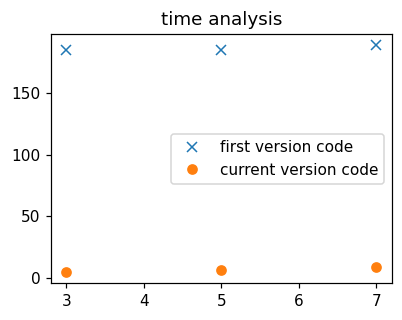

In [46]:
plt.figure(figsize=(4, 3), dpi=110)

plt.plot(x_axis, time1, 'x', label='first version code')
plt.plot(x_axis, time2, 'o', label='current version code')
plt.title('time analysis')
plt.legend()
plt.show()

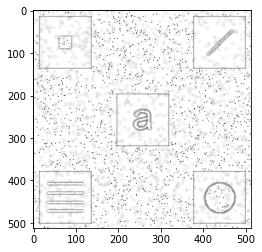

In [32]:
plt.imshow(local_equalized, cmap='gray', vmin=0, vmax=255)
plt.show()

### Histogram Statistic

In [39]:
img = cv2.cvtColor(cv2.imread('Fig0326.tif'), cv2.COLOR_RGB2GRAY)
H = img.shape[0]
W = img.shape[1]

In [40]:
mG = np.average(img)
varG = np.var(img)

k0 = 0.02
k1 = 0.5
k2 = 0
k3 = 0.5
E = 30

k0mG = k0 * mG
k1mG = k1 * mG
k2varG = k2 * varG
k3varG = k3 * varG

_kernel_size = 3
assert _kernel_size % 2 == 1
_s_half = _kernel_size // 2
_l_half = _kernel_size // 2 + 1
padded = np.pad(img, (_s_half, _s_half))

_H = H + 1
_W = W + 1
statistic_res = np.copy(img)
for i in range(_s_half, _H):
    for j in range(_s_half, _W):
        Sxy = padded[i - _s_half:i + _l_half, j - _s_half:j + _l_half]
        mSxy = np.average(Sxy)
        varSxy = np.var(Sxy)
        # print(mSxy, varSxy)
        if k0mG <= mSxy <= k1mG and k2varG <= varSxy <= k3varG:
            statistic_res[i - 1, j - 1] *= E

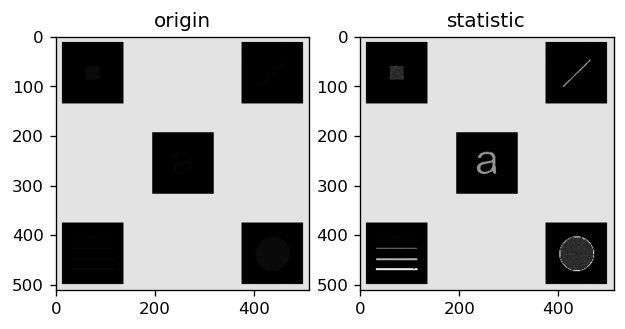

In [41]:
plt.figure(dpi=120)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('origin')
plt.subplot(1, 2, 2)
plt.imshow(statistic_res, cmap='gray', vmin=0, vmax=255)
plt.title('statistic')
plt.show()

In [ ]:
print(k0mG, k1mG)
print(k2varG, k3varG)

## Spatial Filter

### Linear Filter

In [ ]:
img = cv2.cvtColor(cv2.imread("./Q3_4.tif"), cv2.COLOR_BGR2GRAY)
H = img.shape[0]
W = img.shape[1]
_H = H + 1
_W = W + 1
kernel = 1 / 9 * np.ones((3, 3))
_kernel_size = kernel.shape[0]
assert _kernel_size % 2 == 1  # only handel odd kernel
_s_half = _kernel_size // 2
_l_half = _kernel_size // 2 + 1
padded = np.pad(img, (_s_half, _s_half))

In [ ]:
box_filtered = np.zeros_like(img)
for i in range(_s_half, _H):
    for j in range(_s_half, _W):
        box_filtered[i - 1, j - 1] = np.uint8(
            np.round(np.sum(kernel * padded[i - _s_half:i + _l_half, j - _s_half:j + _l_half])))

In [ ]:
box_filtered2 = box_filtered

In [ ]:
plt.figure(dpi=120)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('original')
plt.subplot(1, 3, 2)
plt.imshow(box_filtered2, cmap='gray', vmin=0, vmax=255)
plt.title('kernel_size = 3')
plt.subplot(1, 3, 3)
plt.imshow(box_filtered, cmap='gray', vmin=0, vmax=255)
plt.title('kernel_size = 7')
plt.show()

### Optimized-linear

In [ ]:
from time import time

In [ ]:
img = cv2.cvtColor(cv2.imread("./Q3_4.tif"), cv2.COLOR_BGR2GRAY)
H = img.shape[0]
W = img.shape[1]

In [ ]:
star = time()
box_filtered = np.zeros_like(img)
big_mat = np.zeros((H * W, _kernel_size * _kernel_size))
cnt = 0
for i in range(_s_half, _H):
    for j in range(_s_half, _W):
        big_mat[cnt] = padded[i - _s_half:i + _l_half, j - _s_half:j + _l_half].ravel()
        cnt += 1
box_filtered = (big_mat @ kernel.ravel()).reshape(H, W)
end = time()
print('time:', end - star)

In [ ]:
plt.imshow(box_filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

### Gaussian Low-pass Filter Design

In [45]:
img = cv2.cvtColor(cv2.imread("./Q3_4.tif"), cv2.COLOR_BGR2GRAY)

K = 1
sigma = 5
_kernel_size = np.ceil(6 * sigma).astype(int)
if _kernel_size % 2 == 0:
    _kernel_size += 1

# get the distance matrix
R_gen_size = (_kernel_size - 1) // 2
R_gen_row = np.arange(1, R_gen_size + 1) ** 2
R_gen = np.zeros((R_gen_size, R_gen_size))
for i in range(1, R_gen_size + 1):
    R_gen[i - 1] = R_gen_row + R_gen_row[i - 1]
R_right = np.vstack((np.flipud(R_gen), R_gen_row, R_gen))
R_mid = np.r_[np.flip(R_gen_row), [0], R_gen_row]
R_left = np.fliplr(R_right)
R = np.hstack((R_left, R_mid.reshape(_kernel_size, 1), R_right))

# generate coefficient w
G = K * np.exp(-R / (2 * sigma ** 2))

In [46]:
kernel = 1 / np.sum(G) * G
# _kernel_size = kernel.shape[0]
assert _kernel_size % 2 == 1  # only handel odd kernel
_s_half = _kernel_size // 2
_l_half = _kernel_size // 2 + 1
padded = np.pad(img, (_s_half, _s_half))
_H = H + _s_half
_W = W + _s_half

In [47]:
box_filtered = np.zeros_like(img)
big_mat = np.zeros((H * W, _kernel_size * _kernel_size))
cnt = 0
for i in range(_s_half, _H):
    for j in range(_s_half, _W):
        big_mat[cnt] = padded[i - _s_half:i + _l_half, j - _s_half:j + _l_half].ravel()
        cnt += 1
box_filtered = (big_mat @ kernel.ravel()).reshape(H, W)

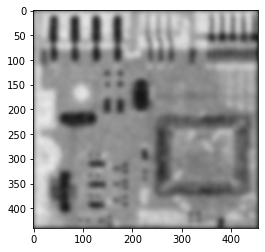

In [48]:
plt.imshow(box_filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

### Order-Statistic Filter

In [42]:
img = cv2.cvtColor(cv2.imread("./Q3_4.tif"), cv2.COLOR_BGR2GRAY)
H = img.shape[0]
W = img.shape[1]

_kernel_size = 3
assert _kernel_size % 2 == 1  # only handel odd kernel
_s_half = _kernel_size // 2
_l_half = _kernel_size // 2 + 1
padded = np.pad(img, (_s_half, _s_half))

In [43]:
order_filtered = np.zeros_like(img)

_H = H + _s_half
_W = W + _s_half
for i in range(_s_half, _H):
    for j in range(_s_half, _W):
        order_filtered[i - 1, j - 1] = np.median(padded[i - _s_half:i + _l_half, j - _s_half:j + _l_half])

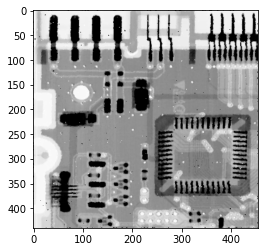

In [44]:
plt.imshow(order_filtered, cmap='gray', vmin=0, vmax=255)
plt.show()